# Topic 7 Example 21

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try: 
    from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
except:
    %pip install sympy
from sympy import *
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, cos, arg, atan2, re, cos, exp_polar, pi
from sympy.abc import A,B,t,f 
from sympy import re, im 

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [2]:
tlim = 4
tt = np.linspace(-tlim, tlim, 1000)
flim = 2
ff = np.linspace(-flim, flim, 1000)

def my_rect(p):
    return Piecewise((0, t <= -p/2),(1, t <= p/2),(0, True))

p = Symbol('p')
sincu = lambda t,p: sinc(p*pi*t) # swithc to sinc ftn that evetyone else uses...

## Windowing

In [3]:
# Cosine that is zeroed for |t| > 2
SS6 = my_rect(4)*cos(pi*t)
lam_SS6 = lambdify(t, SS6, modules=['numpy'])

In [4]:
QSS6 = fourier_transform(SS6, t, f)
lam_QSS6 = lambdify(f, QSS6, modules=['numpy'])

def QSS6_analytic(f):
    return 2*np.sinc(4*f-2) + 2*np.sinc(4*f+2) ## numpy sinc doesn't require the pi, sympy's does

In [5]:
QSS6

Piecewise((2.0, Eq(f, -1/2) | Eq(f, 1/2)), (4*f*sin(4*pi*f)/(pi*(4*f**2 - 1)), True))

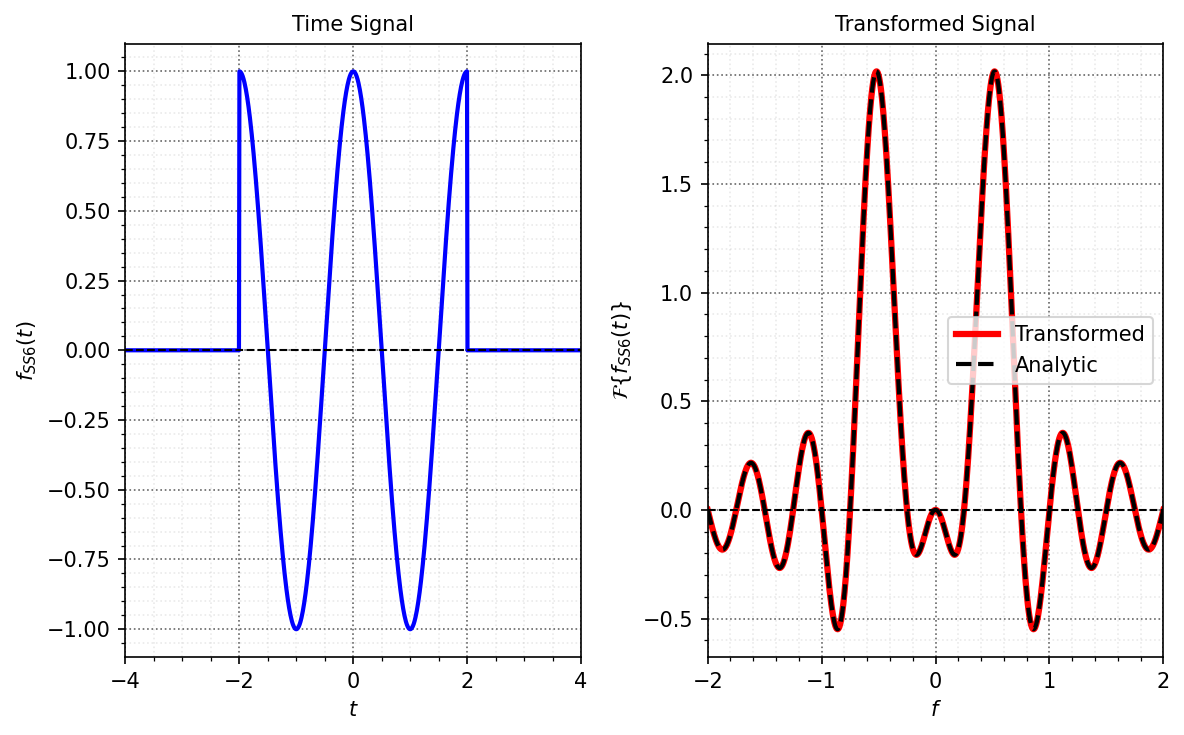

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=150)
ax1.plot(tt, lam_SS6(tt), 'b-', lw=2)
ax1.set_title('Time Signal')
ax1.set_ylabel('$f_{SS6}(t)$')
ax1.set_xlabel('$t$')
nicegrid(ax1)

ax2.plot(ff, lam_QSS6(ff), 'r-', lw=3,label='Transformed')
ax2.plot(ff, QSS6_analytic(ff), 'k--', lw=2,label='Analytic')
ax2.set_title('Transformed Signal')
ax2.set_ylabel('${\cal F}\{ f_{SS6}(t)\}$')
ax2.set_xlabel('$f$')
nicegrid(ax2)
plt.legend()
plt.show()

In [62]:
p = 2 # scaling on the windowing
m = 0.25 # scaling on the freq of the signal

tlim = np.int(p/2)+1
tt = np.linspace(-tlim, tlim, 1000)
flim = m+3
ff = np.linspace(-flim, flim, 1000)

# Cosine that is zeroed for |t| > 2
SS_21 = my_rect(p)*cos(m*2*pi*t)
lam_SS_21 = lambdify(t, SS_21)

In [63]:
QSS_21 = fourier_transform(SS_21, t, f)
lam_QSS_21 = lambdify(f, QSS_21)

def QSS_21_analytic(f):
    return (np.sinc(p*(f-m)) + np.sinc(p*(f+m)))*p/2 ## numpy sinc doesn't require the pi, sympy's does

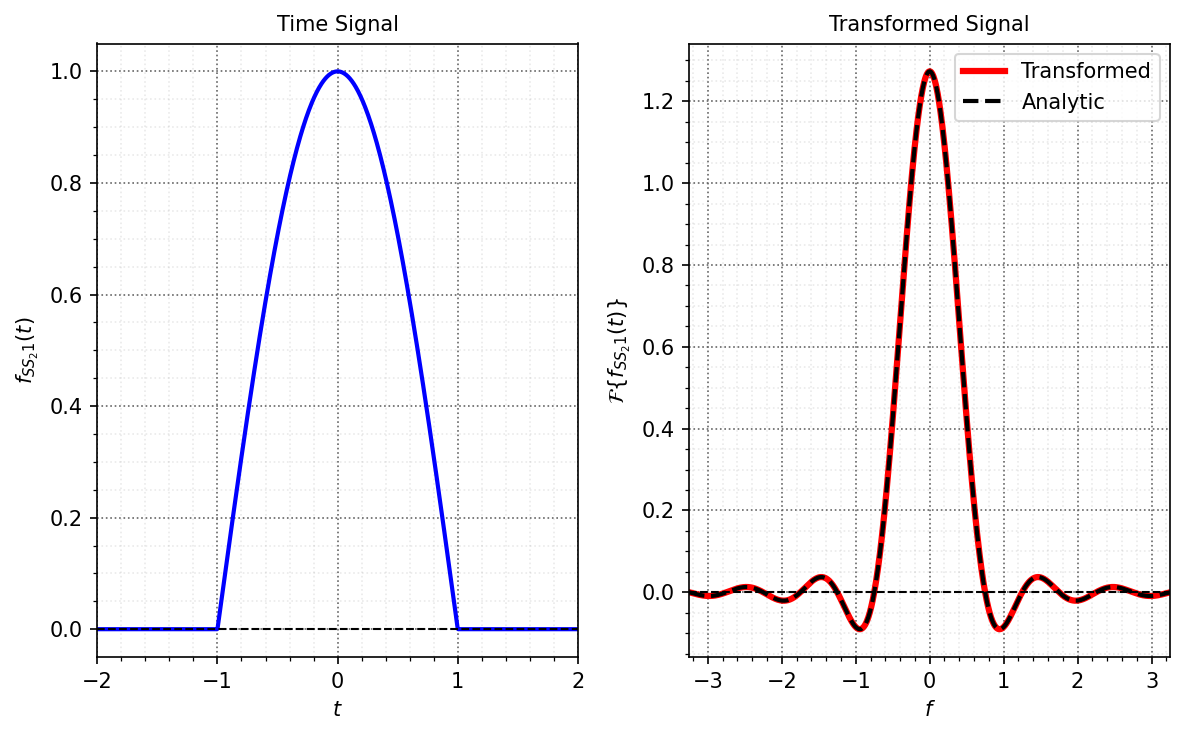

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=150)
ax1.plot(tt, lam_SS_21(tt), 'b-', lw=2)
ax1.set_title('Time Signal')
ax1.set_ylabel('$f_{SS_21}(t)$')
ax1.set_xlabel('$t$')
nicegrid(ax1)

ax2.plot(ff, lam_QSS_21(ff), 'r-', lw=3,label='Transformed')
ax2.plot(ff, QSS_21_analytic(ff), 'k--', lw=2,label='Analytic')
ax2.set_title('Transformed Signal')
ax2.set_ylabel('${\cal F}\{ f_{SS_21}(t)\}$')
ax2.set_xlabel('$f$')
nicegrid(ax2)
plt.legend()
plt.show()